## Loading the Data

In [255]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, r2_score
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

In [256]:
df = pd.read_csv("flickr_data2.csv", delimiter=",",encoding="UTF-8")
df.head()

C:\Users\marti\AppData\Local\Temp\ipykernel_27320\1372696961.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flickr_data2.csv", delimiter=",",encoding="UTF-8")


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN


## Understanding the data

In [257]:
df.shape

(420240, 19)

In [258]:
df.dtypes

id                       int64
 user                   object
 lat                   float64
 long                  float64
 tags                   object
 title                  object
 date_taken_minute     float64
 date_taken_hour         int64
 date_taken_day          int64
 date_taken_month        int64
 date_taken_year         int64
 date_upload_minute     object
 date_upload_hour       object
 date_upload_day       float64
 date_upload_month       int64
 date_upload_year      float64
Unnamed: 16            float64
Unnamed: 17            float64
Unnamed: 18            float64
dtype: object

In [259]:
list(df.columns)

['id',
 ' user',
 ' lat',
 ' long',
 ' tags',
 ' title',
 ' date_taken_minute',
 ' date_taken_hour',
 ' date_taken_day',
 ' date_taken_month',
 ' date_taken_year',
 ' date_upload_minute',
 ' date_upload_hour',
 ' date_upload_day',
 ' date_upload_month',
 ' date_upload_year',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [260]:
df.columns = df.columns.str.strip()

In [261]:
list(df.columns)

['id',
 'user',
 'lat',
 'long',
 'tags',
 'title',
 'date_taken_minute',
 'date_taken_hour',
 'date_taken_day',
 'date_taken_month',
 'date_taken_year',
 'date_upload_minute',
 'date_upload_hour',
 'date_upload_day',
 'date_upload_month',
 'date_upload_year',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [262]:
df["date_upload_minute"] = pd.to_numeric(
    df["date_upload_minute"], errors="coerce"
)


In [263]:

df["date_upload_hour"] = pd.to_numeric(
    df["date_upload_hour"], errors="coerce"
)

In [264]:
atributosNum = df.select_dtypes(include=[np.number]).columns
pd.DataFrame(atributosNum, columns=['Atributos numéricos'])

,Atributos numéricos
0,id
1,lat
2,long
3,date_taken_minute
4,date_taken_hour
5,date_taken_day
6,date_taken_month
7,date_taken_year
8,date_upload_minute
9,date_upload_hour


In [265]:
atributosNum = atributosNum.drop(
    ["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"],
 
)
atributosNum

Index(['id', 'lat', 'long', 'date_taken_minute', 'date_taken_hour',
       'date_taken_day', 'date_taken_month', 'date_taken_year',
       'date_upload_minute', 'date_upload_hour', 'date_upload_day',
       'date_upload_month', 'date_upload_year'],
      dtype='object')

In [266]:
df[atributosNum].describe()

,id,lat,long,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
count,4.202400e+05,420240.000000,420240.000000,420239.000000,420240.000000,420240.000000,420240.000000,420240.000000,420099.000000,420236.000000,420238.000000,420240.000000,420239.000000
mean,2.002697e+10,45.768173,4.839672,30.068559,14.746695,15.456813,7.000493,2013.294256,29.509608,14.559624,16.398738,6.698277,2013.648624
std,1.411384e+10,0.028575,0.031619,39.880117,6.583236,9.637870,4.611831,37.141359,17.529407,6.526078,8.450967,4.672163,37.006109
min,3.066675e+08,45.655200,4.720312,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,7.094503e+09,45.757613,4.826202,14.000000,12.000000,8.000000,4.000000,2012.000000,15.000000,11.000000,9.000000,4.000000,2012.000000
50%,1.548087e+10,45.763152,4.832183,30.000000,15.000000,15.000000,7.000000,2014.000000,30.000000,16.000000,17.000000,7.000000,2014.000000
75%,3.145886e+10,45.773509,4.846558,45.000000,18.000000,23.000000,10.000000,2017.000000,44.000000,20.000000,24.000000,10.000000,2017.000000
max,4.914809e+10,45.854950,5.006709,2019.000000,2013.000000,2013.000000,2011.000000,2238.000000,2018.000000,54.000000,31.000000,2011.000000,2019.000000


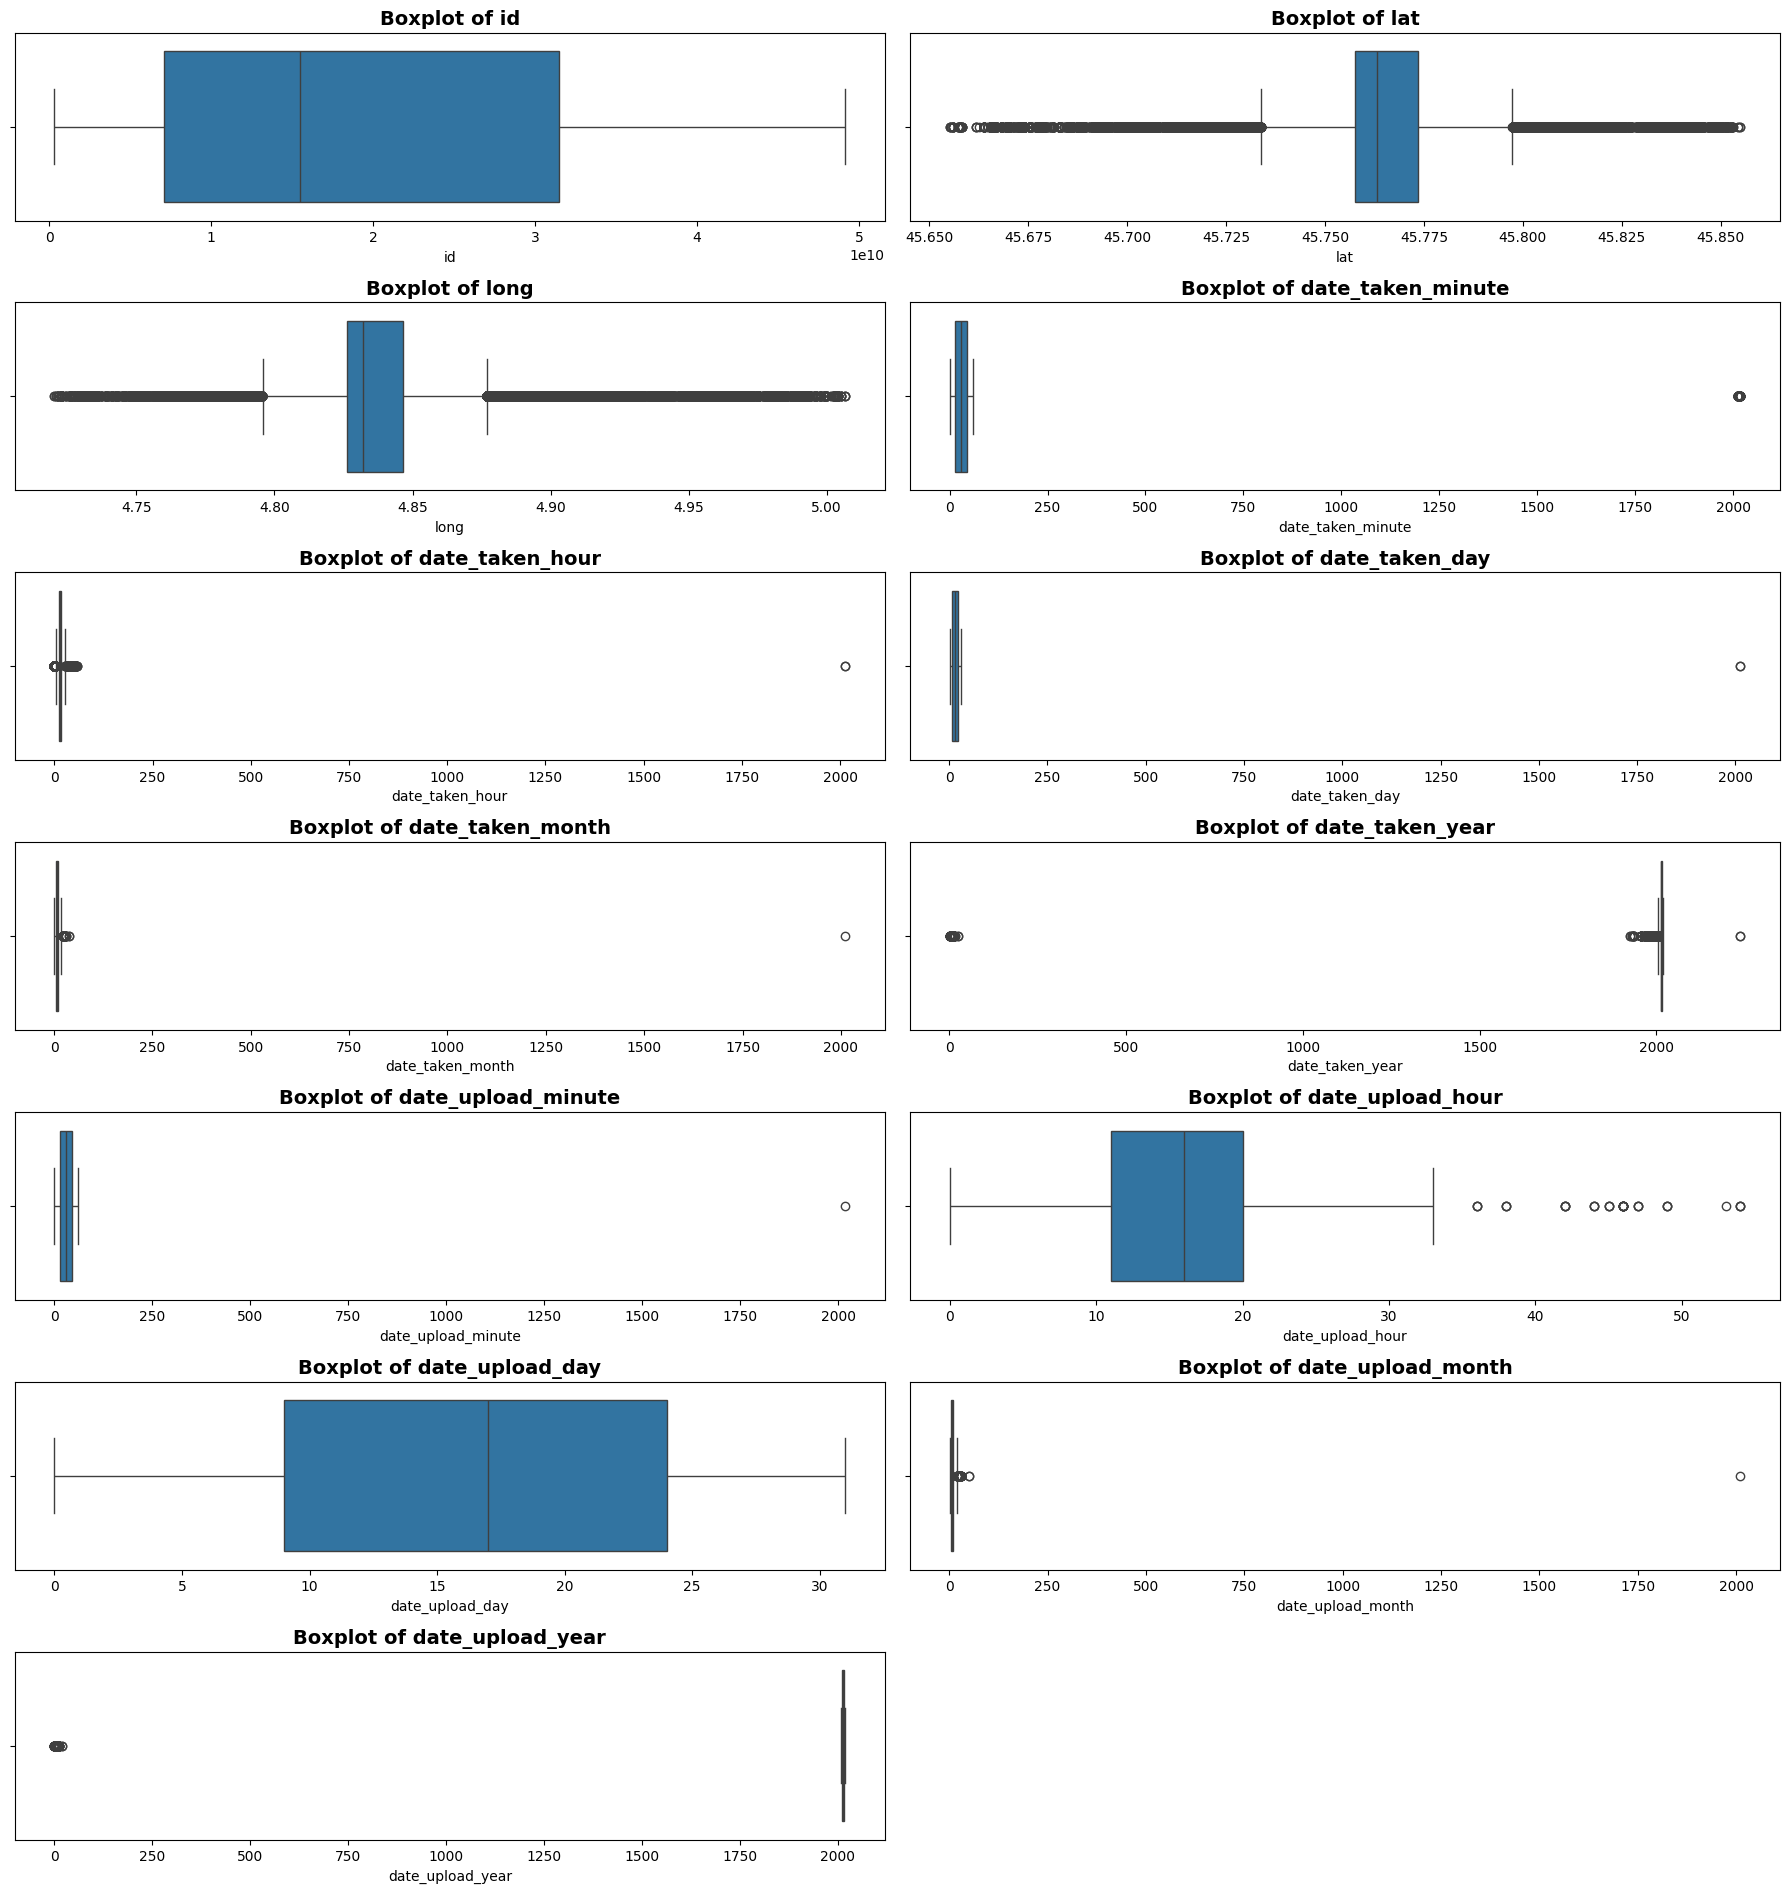

In [267]:

plt.figure(figsize=(18, 24))
for i, col in enumerate(atributosNum, 1):
    plt.subplot(9, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

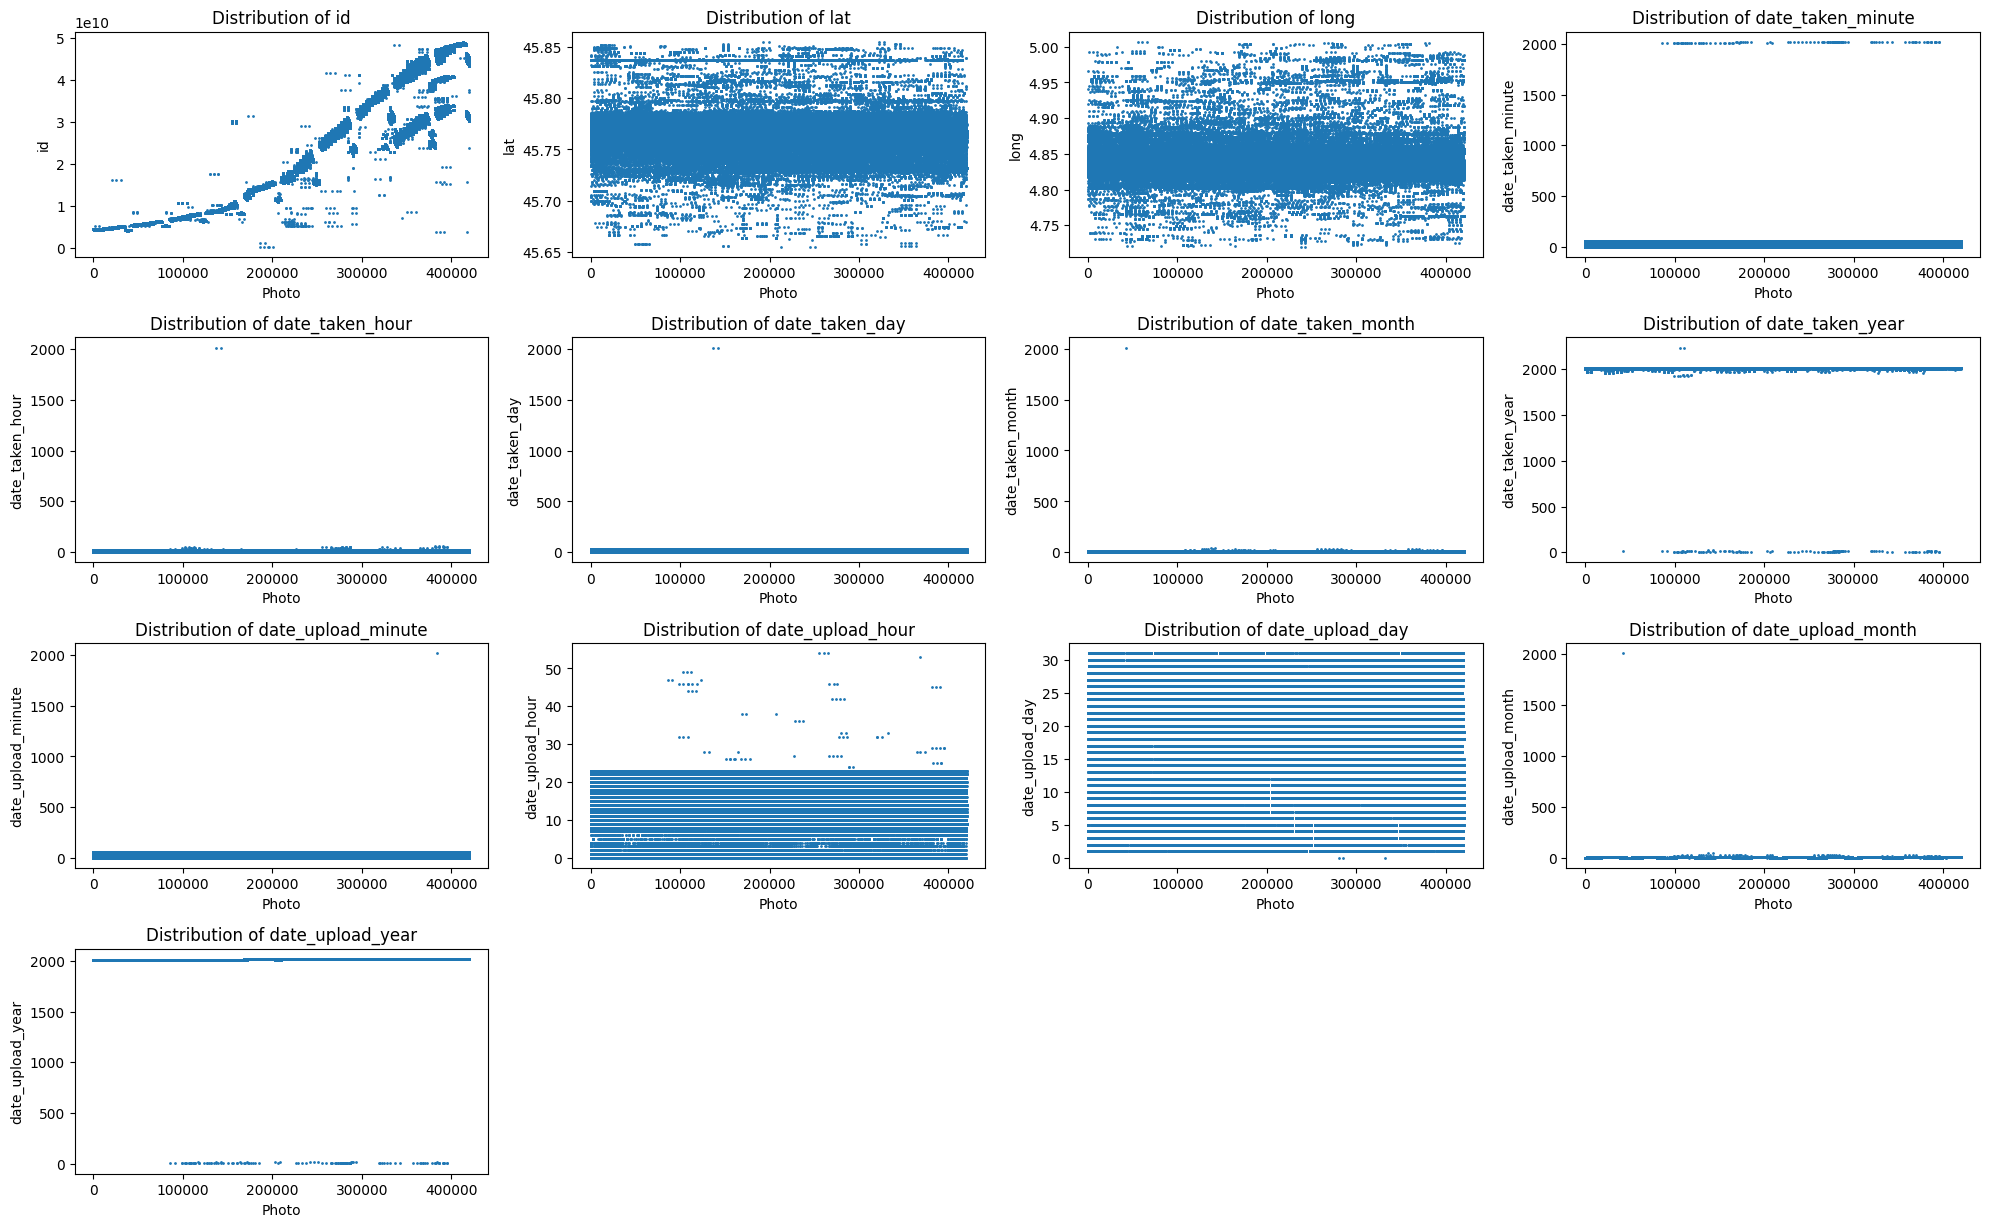

In [268]:

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada variable y crear un scatter plot
for i, var in enumerate(atributosNum):
    x = df.index  # Índices de los pacientes
    y = df[var]   # Variable actual

    axes[i].scatter(x, y, s=1)
    axes[i].set_xlabel('Photo')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Distribution of {var}')

# Eliminar cualquier subplot vacío si hay menos variables que subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [269]:
porcentajeIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Feature": porcentajeIncompletitudAtributo.index,
    "Compleateness (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompleateness (%)": porcentajeIncompletitudAtributo.values,
    "# of missing entrances": porcentajeIncompletitudAtributo.values * df.shape[0] / 100
})

,Feature,Compleateness (%),Incompleateness (%),# of missing entrances
0,Unnamed: 17,0.000000,100.000000,420240.0
1,Unnamed: 18,0.000476,99.999524,420238.0
2,Unnamed: 16,0.033790,99.966210,420098.0
3,tags,75.368837,24.631163,103510.0
4,title,90.879259,9.120741,38329.0
5,date_upload_minute,99.966448,0.033552,141.0
6,date_upload_hour,99.999048,0.000952,4.0
7,date_upload_day,99.999524,0.000476,2.0
8,date_taken_minute,99.999762,0.000238,1.0
9,date_upload_year,99.999762,0.000238,1.0


In [270]:
registrosDuplicados = df.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"There are {totalDuplicados} duplicated entrences ({porcentajeDuplicados:.2f}%)")

There are 252139 duplicated entrences (60.00%)


In [271]:

numeric_minimums = {
    "lat": 44,
    "long": 4,
    "date_taken_minute": 0,
    "date_taken_hour": 0,
    "date_taken_day": 1,
    "date_taken_month": 0, 
    "date_taken_year": 1990,
    "date_upload_minute": 0,
    "date_upload_hour": 0,
    "date_upload_day": 1,
    "date_upload_month": 1,
    "date_upload_year": 1990
}


numeric_maximums = {
   "lat": 48,
    "long": 6,
    "date_taken_minute": 59,
    "date_taken_hour": 59,
    "date_taken_day": 31,
    "date_taken_month": 12, 
    "date_taken_year": 2026,
    "date_upload_minute": 59,
    "date_upload_hour": 24,
    "date_upload_day": 32,
    "date_upload_month": 23,
    "date_upload_year": 2026
}

# Verificar mimin
for col, min_val in numeric_minimums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] < min_val][col]  

    if not out_of_range.empty:
        print(f"\nVals less than {min_val} in {col}:")
        print(out_of_range.describe())

# Verificar maxim
for col, max_val in numeric_maximums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] > max_val][col]  

    if not out_of_range.empty:
        print(f"\nVals over than {max_val} in {col}:")
        print(out_of_range.describe())



Vals less than 1990 in date_taken_year:
count     412.000000
mean     1293.953883
std       938.958133
min         1.000000
25%         9.000000
50%      1974.000000
75%      1980.250000
max      1989.000000
Name: date_taken_year, dtype: float64

Vals less than 1 in date_upload_day:
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: date_upload_day, dtype: float64

Vals less than 1990 in date_upload_year:
count    142.000000
mean       6.978873
std        3.694866
min        1.000000
25%        4.000000
50%        8.000000
75%        9.000000
max       20.000000
Name: date_upload_year, dtype: float64

Vals over than 59 in date_taken_minute:
count     137.000000
mean     2015.189781
std         2.171110
min      2012.000000
25%      2013.000000
50%      2016.000000
75%      2016.000000
max      2019.000000
Name: date_taken_minute, dtype: float64

Vals over than 59 in date_taken_hour:
count       2.0
mean     2013.0
std         

## Cleaning

In [272]:
df_modified = df.copy()

In [273]:
df_modified = df_modified.drop(columns=["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"])
df_modified.head()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23.0,20.0,28.0,2,2010.0
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52.0,17.0,28.0,2,2010.0
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33.0,17.0,28.0,2,2010.0
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38.0,12.0,28.0,2,2010.0
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38.0,12.0,28.0,2,2010.0


In [274]:
df_modified["tags"] = df_modified["tags"].fillna("no tags")
df_modified["title"] = df_modified["title"].fillna("no title")
df_modified.shape

(420240, 16)

In [275]:
# --- date_taken ---
df_modified.loc[
    (df_modified["date_taken_minute"] < 0)
    | (df_modified["date_taken_minute"] > 59),
    "date_taken_minute",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_hour"] < 0)
    | (df_modified["date_taken_hour"] > 23),
    "date_taken_hour",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_day"] < 1)
    | (df_modified["date_taken_day"] > 31),
    "date_taken_day",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_month"] < 1)
    | (df_modified["date_taken_month"] > 12),
    "date_taken_month",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_year"] < 1990)
    | (df_modified["date_taken_year"] > 2026),
    "date_taken_year",
] = pd.NA


# --- date_upload ---
df_modified.loc[
    (df_modified["date_upload_minute"] < 0)
    | (df_modified["date_upload_minute"] > 59),
    "date_upload_minute",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_hour"] < 0)
    | (df_modified["date_upload_hour"] > 23),
    "date_upload_hour",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_day"] < 1)
    | (df_modified["date_upload_day"] > 31),
    "date_upload_day",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_month"] < 1)
    | (df_modified["date_upload_month"] > 12),
    "date_upload_month",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_year"] < 1990)
    | (df_modified["date_upload_year"] > 2026),
    "date_upload_year",
] = pd.NA

In [276]:
df_modified = df_modified.dropna()
df_modified.shape

(419826, 16)

In [277]:
df_modified = df_modified.drop_duplicates()
df_modified.shape

(167954, 16)

In [278]:
import string
import re
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer, SnowballStemmer
import contractions

In [279]:
# Descargar el conjunto de palabras de parada (stopwords) de nltk
nltk.download('stopwords')

# Descargar el tokenizer preentrenado 'punkt' para dividir texto en oraciones y palabras
nltk.download('punkt')

# Descargar el léxico WordNet para la lematización y otras tareas léxicas
nltk.download('wordnet')

# Descargar el Open Multilingual Wordnet (OMW) para soporte multilingüe en WordNet
nltk.download('omw-1.4')

# Descargar esta liberaria para realizar la tokenización de texto
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def aMinusculas(palabras):
    return [palabra.lower() for palabra in palabras]

def clean_text(text):
    if isinstance(text, str):
        text = text.replace(',', ' ')
        text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ0-9.,;:\"\'\s]', '', text)  # Eliminar caracteres extraños
        text = re.sub(r'\s+', ' ', text).strip()  # Espacios extra
    return text

def eliminarNumeros(palabras):
    return [re.sub(r'\d+', '', palabra) for palabra in palabras]

def eliminarPuntuacion(palabras):
    return [palabra for palabra in palabras if palabra not in string.punctuation]

def removerNoAscii(palabras):
    return [palabra for palabra in palabras if palabra.isascii()]

def eliminarStopwords(palabras):
    sw = set(stopwords.words('french'))
    return [palabra for palabra in palabras if palabra not in sw]

def aplicarStemmingYLematizacion(palabras):
    stemmer = SnowballStemmer('french')
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(stemmer.stem(palabra)) for palabra in palabras]

#def eliminarLyon(palabras):
    

def preprocesar(palabras):
    palabras = aMinusculas(palabras)
    palabras = eliminarNumeros(palabras)
    palabras = eliminarPuntuacion(palabras)
    palabras = removerNoAscii(palabras)
    palabras = eliminarStopwords(palabras)
    #palabras = eliminarLyon(palabras)
    return palabras

def procesar(texto):
    texto = contractions.fix(texto)
    palabras = word_tokenize(texto)
    palabras = preprocesar(palabras)
    palabras = aplicarStemmingYLematizacion(palabras)
    return ' '.join(palabras)

In [281]:
features = [
    "lat",
    "long",
]
X = df_modified[features]
X

,lat,long
0,45.754858,4.821710
1,45.753270,4.862953
2,45.760655,4.846564
3,45.784000,4.874072
4,45.784000,4.874072
...,...,...
419086,45.729498,4.951550
419087,45.729498,4.951550
419098,45.729498,4.951550
419137,45.771852,4.833115


In [282]:
from sklearn.cluster import KMeans

#coordsRad = np.radians(X)

kmeans = KMeans(n_clusters=219, random_state=42)#cluster number dbscan
df_modified["cluster"] = kmeans.fit_predict(X)

In [283]:
df_modified.head()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,cluster
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15.0,28.0,2.0,2010.0,23.0,20.0,28.0,2.0,2010.0,129
1,4394748717,35853470@N00,45.753270,4.862953,no tags,no title,51.0,17.0,28.0,2.0,2010.0,52.0,17.0,28.0,2.0,2010.0,201
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17.0,28.0,2.0,2010.0,33.0,17.0,28.0,2.0,2010.0,132
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20.0,28.0,1.0,2010.0,38.0,12.0,28.0,2.0,2010.0,83
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20.0,28.0,1.0,2010.0,38.0,12.0,28.0,2.0,2010.0,83


In [284]:
df_procesado = df_modified.copy()
df_procesado["title"] = df_procesado["title"].astype(str)
df_procesado["tags"] = df_procesado["tags"].astype(str)


In [ ]:
df_procesado['Texto'] = df_procesado['tags'] + ' ' + df_procesado['title']
df_procesado['Texto'] = df_procesado['Texto'].apply(preprocesar)
df_procesado.head()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,cluster,Texto
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15.0,28.0,2.0,2010.0,23.0,20.0,28.0,2.0,2010.0,129,chair lyon chais chais vu
1,4394748717,35853470@N00,45.753270,4.862953,no tags,no title,51.0,17.0,28.0,2.0,2010.0,52.0,17.0,28.0,2.0,2010.0,201,no tag no titl
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17.0,28.0,2.0,2010.0,33.0,17.0,28.0,2.0,2010.0,132,iphon r v b
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20.0,28.0,1.0,2010.0,38.0,12.0,28.0,2.0,2010.0,83,nin nineinchnail gift screening toiou avott --...
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20.0,28.0,1.0,2010.0,38.0,12.0,28.0,2.0,2010.0,83,lyon nin nineinchnail gift screening toiou avo...


In [ ]:
df_procesado['Texto'] = df_procesado['tags'] + ' ' + df_procesado['title']
df_procesado['Texto'] = df_procesado['Texto'].apply(procesar)
df_procesado.head()

In [286]:
df_procesado = df_procesado[
    ~(
        (df_procesado['title'].str.lower() == 'no title') | 
        (df_procesado['tags'].str.lower() == 'no tags')
    )
]
df_procesado = df_procesado.reset_index(drop=True)

In [287]:
df_procesado['Texto'] = df_procesado['Texto'].apply(clean_text)

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [289]:
print(df_procesado['Texto'].head())

0                            chair lyon chais chais vu
1                                          iphon r v b
2    nin nineinchnail gift screening toiou avott to...
3    lyon nin nineinchnail gift screening toiou avo...
4          franc lyon lesphotosdevoyag couret lyonnais
Name: Texto, dtype: object


In [290]:
tf_idf_vectorizer = TfidfVectorizer(decode_error='ignore')
X_tf_idf = tf_idf_vectorizer.fit_transform(df_procesado['Texto'])
y_tf_idf = df_procesado['cluster']
print(X_tf_idf.shape)  

#print(X_tf_idf.toarray()[0])

(120333, 43444)


In [291]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_tf_idf, y_tf_idf, test_size=0.4, random_state=0)

print(X_train.shape, X_validation.shape)

(72199, 43444) (48134, 43444)


In [292]:
stop_words = stopwords.words('french')
def mostrar_grafico(palabras, stopwords=[]):
    comment_words = ""

    for val in palabras:
        val = str(val)
        tokens = val.split()
        tokens = [t.lower() for t in tokens]
        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color="white",
        stopwords=stopwords,
        min_font_size=10,
    ).generate(comment_words)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [293]:
from collections import Counter

def mostrar_grafico2(palabras, stopwords=[]):
    # Unir todas las palabras
    comment_words = ""
    for val in palabras:
        val = str(val)
        tokens = val.split()
        tokens = [t.lower() for t in tokens if t.lower() not in stopwords]
        comment_words += " ".join(tokens) + " "
    
    # Contar frecuencias
    word_freq = Counter(comment_words.split()).most_common(50)
    
    if not word_freq:
        print("No hay palabras para mostrar")
        return
    
    words = [w[0] for w in word_freq]
    freqs = [w[1] for w in word_freq]
    
    # Normalizar tamaños
    max_freq = max(freqs)
    sizes = [15 + (f / max_freq) * 70 for f in freqs]
    
    # Posiciones aleatorias
    np.random.seed(42)
    x = np.random.rand(len(words))
    y = np.random.rand(len(words))
    colors = plt.cm.Set3(np.random.rand(len(words)))
    
    # Graficar
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(words):
        plt.text(x[i], y[i], word, 
                fontsize=sizes[i],
                color=colors[i],
                alpha=0.8,
                ha='center', va='center',
                rotation=np.random.randint(-45, 45))
    
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [294]:
""" for i in list(df_procesado['cluster'].unique())[:5]:
    print(f'---------- Words for Titulos: {i} ----------')
    mostrar_grafico(
        df_procesado.loc[df_procesado['cluster']==i, 'title'], 
        stopwords=stop_words
    ) """

" for i in list(df_procesado['cluster'].unique())[:5]:\n    print(f'---------- Words for Titulos: {i} ----------')\n    mostrar_grafico(\n        df_procesado.loc[df_procesado['cluster']==i, 'title'], \n        stopwords=stop_words\n    ) "

---------- Words for Titulos: 129 ----------


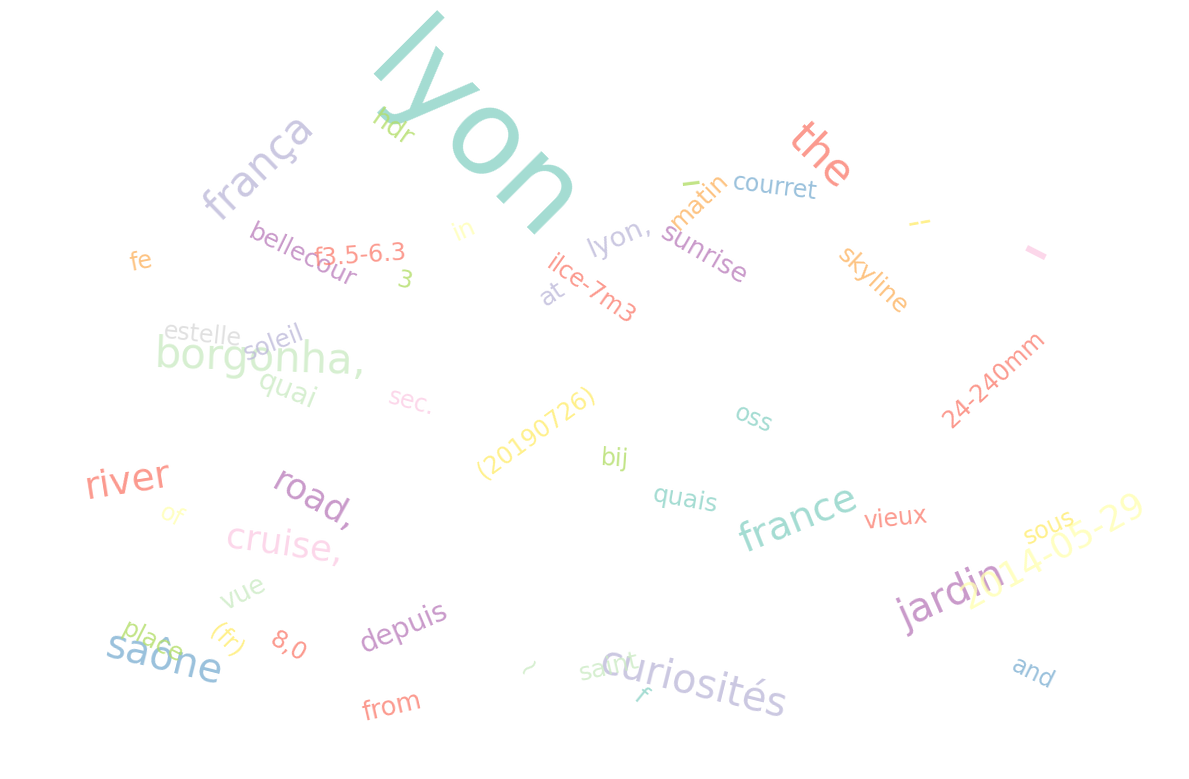

---------- Words for Titulos: 132 ----------


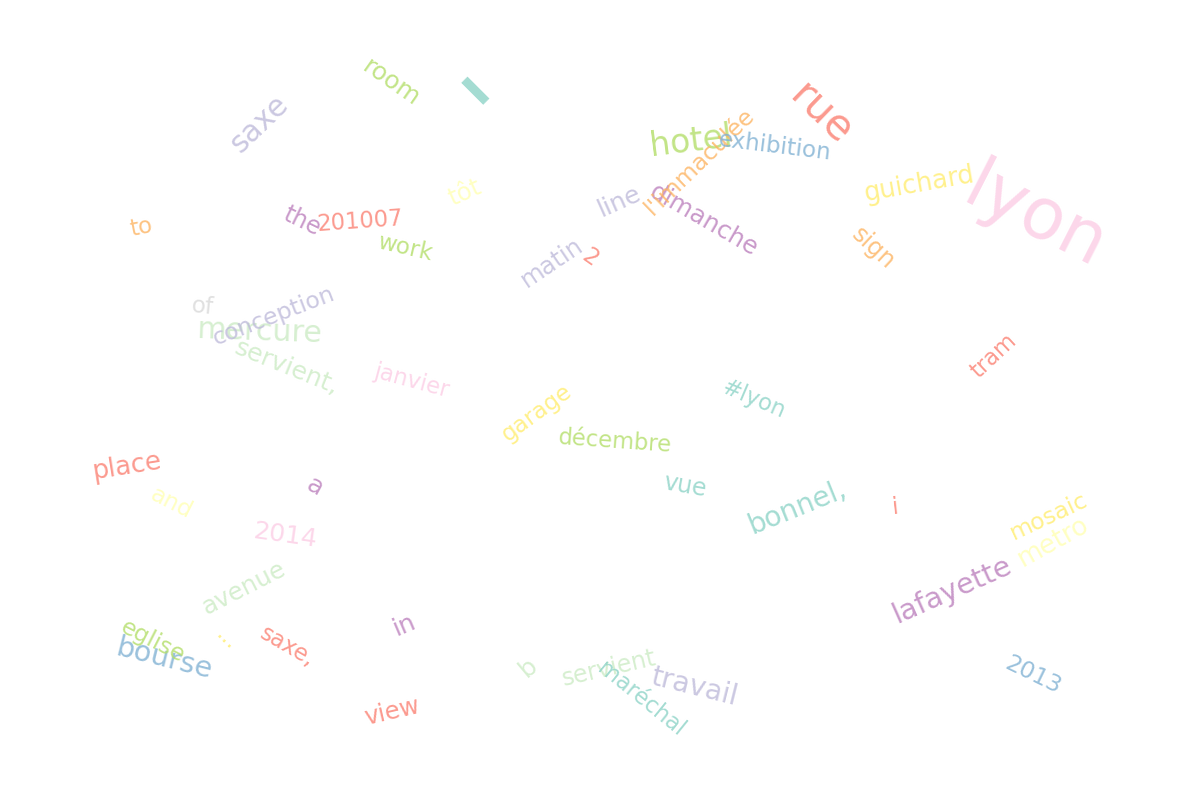

---------- Words for Titulos: 83 ----------


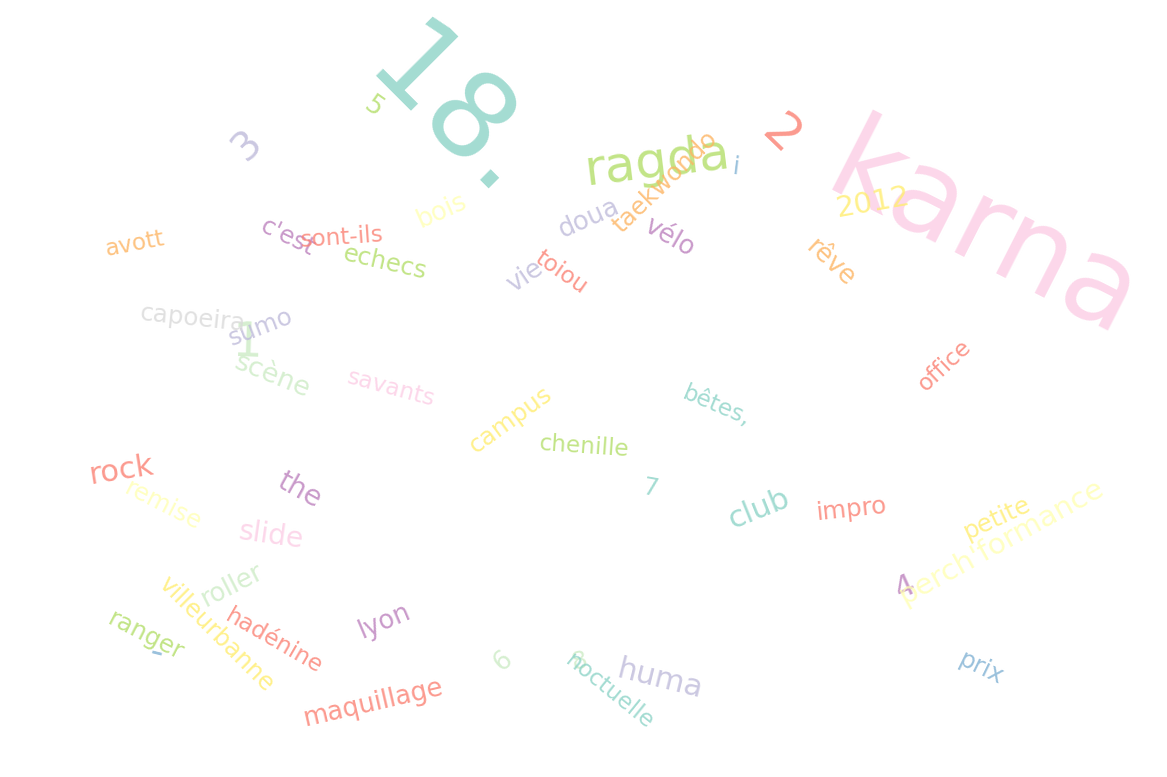

---------- Words for Titulos: 51 ----------


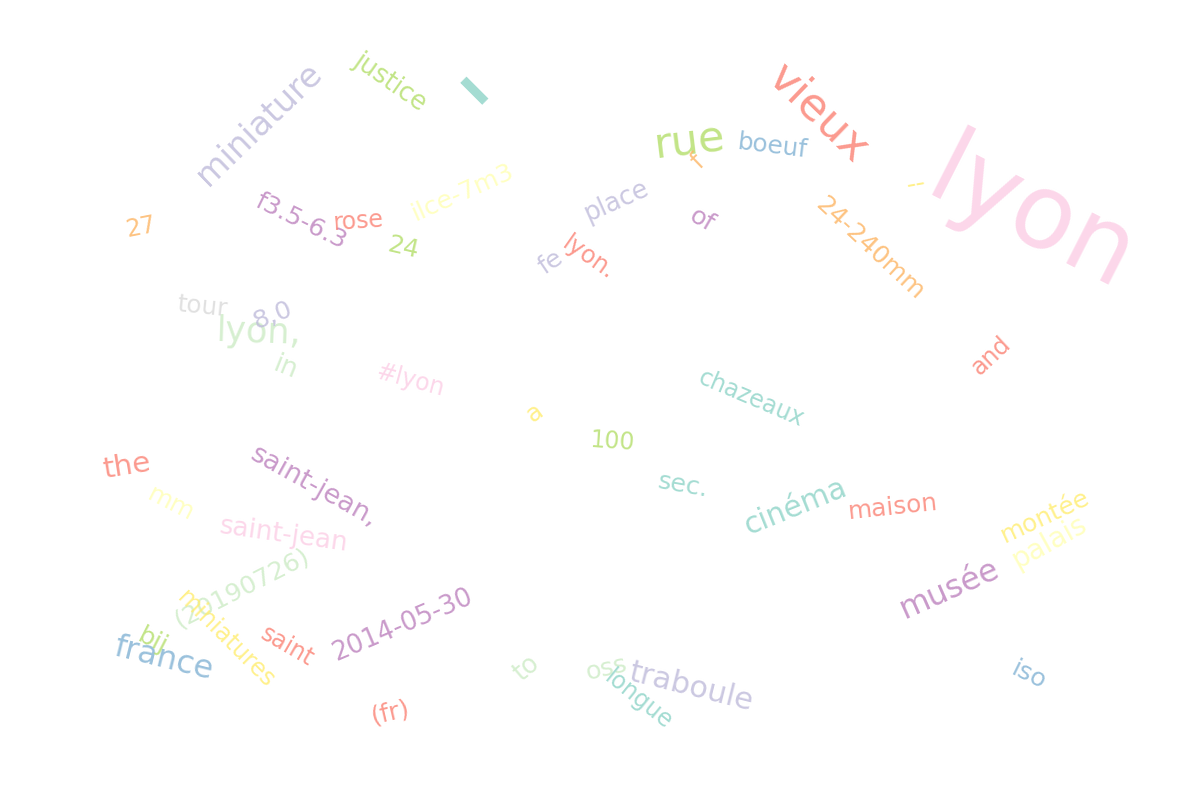

---------- Words for Titulos: 47 ----------


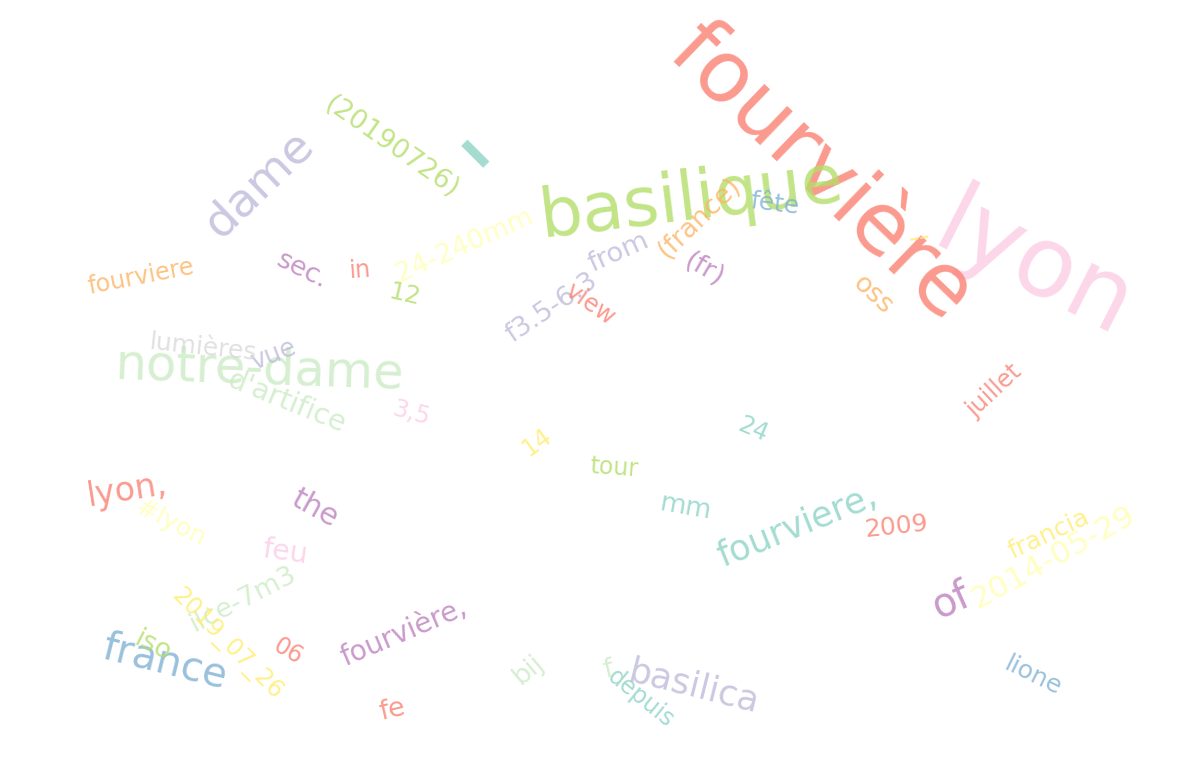

In [295]:
for i in list(df_procesado['cluster'].unique())[:5]:
    print(f'---------- Words for Titulos: {i} ----------')
    mostrar_grafico2(
        df_procesado.loc[df_procesado['cluster']==i, 'title'], 
        stopwords=stop_words
    )

In [296]:
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [297]:
y_predTrainSS_BNaive = model.predict(X_train)

In [298]:
# Evaluación del con
accuracy = accuracy_score(Y_train, y_predTrainSS_BNaive)
precision = precision_score(Y_train, y_predTrainSS_BNaive, average='weighted')
recall = recall_score(Y_train, y_predTrainSS_BNaive, average='weighted')
f1 = f1_score(Y_train, y_predTrainSS_BNaive, average='weighted')
f2 = fbeta_score(Y_train, y_predTrainSS_BNaive, beta=2, average='weighted')

print("--- MÉTRICAS DEL ENTRENAMIENTO ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
#print(classification_report(Y_train, y_predTrainSS_BNaive))

--- MÉTRICAS DEL ENTRENAMIENTO ---
Accuracy: 0.5098
Precision: 0.6810
Recall: 0.5098
F1 Score: 0.4811
F2 Score: 0.4809


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [299]:
y_pred_validationSS = model.predict(X_validation)

accuracy = accuracy_score(Y_validation, y_pred_validationSS)
precision = precision_score(Y_validation, y_pred_validationSS, average='weighted')
recall = recall_score(Y_validation, y_pred_validationSS, average='weighted')
f1 = f1_score(Y_validation, y_pred_validationSS, average='weighted')
f2 = fbeta_score(Y_validation, y_pred_validationSS, beta=2, average='weighted')

print("VALIDACIÓN")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
#print(classification_report(Y_validation, y_pred_validationSS))

VALIDACIÓN
Accuracy: 0.4814
Precision: 0.6541
Recall: 0.4814
F1 Score: 0.4508
F2 Score: 0.4518


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [300]:
#conf_matrix = confusion_matrix(Y_validation, y_pred_validationSS)
#plt.figure(figsize=(36, 24))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels=['No Fake', 'Fake'], yticklabels=['No Fake', 'Fake'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix- Naive Bayes')
#plt.show()

## Avec smote

In [301]:
from imblearn.over_sampling import SMOTENC

# Solo balancear clusters con suficientes muestras
cluster_counts = Y_train.value_counts()
small_clusters = cluster_counts[cluster_counts < 3].index

# Separar datos
mask_small = Y_train.isin(small_clusters)
X_small, Y_small = X_train[mask_small], Y_train[mask_small]
X_large, Y_large = X_train[~mask_small], Y_train[~mask_small]

# SMOTE solo en clusters grandes
smt = SMOTE(k_neighbors=1, random_state=42)
X_smote, Y_smote = smt.fit_resample(X_large, Y_large)

# Recombinar
from scipy.sparse import vstack
X_smote_f = vstack([X_smote, X_small])
Y_smote_f = np.concatenate([Y_smote, Y_small])



In [302]:
clf = MultinomialNB()
clf.fit(X_smote_f, Y_smote_f)

MultinomialNB()

In [303]:
y_predTrain_BNaive = clf.predict(X_smote_f)

In [304]:
# Evaluación del con
accuracy = accuracy_score(Y_smote_f, y_predTrain_BNaive)
precision = precision_score(Y_smote_f, y_predTrain_BNaive, average='weighted')
recall = recall_score(Y_smote_f, y_predTrain_BNaive, average='weighted')
f1 = f1_score(Y_smote_f, y_predTrain_BNaive, average='weighted')
f2 = fbeta_score(Y_smote_f, y_predTrain_BNaive, beta=2, average='weighted')


print("--- TRAINING ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")

#print(classification_report(Y_smote, y_predTrain_BNaive))

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- TRAINING ---
Accuracy: 0.8399
Precision: 0.8603
Recall: 0.8399
F1 Score: 0.8409
F2 Score: 0.8379


In [305]:
y_pred_validation = clf.predict(X_validation)

accuracy = accuracy_score(Y_validation, y_pred_validation)
precision = precision_score(Y_validation, y_pred_validation, average='weighted')
recall = recall_score(Y_validation, y_pred_validation, average='weighted')
f1 = f1_score(Y_validation, y_pred_validation, average='weighted')
f2 = fbeta_score(Y_validation, y_pred_validation, beta=2, average='weighted')


print("VALIDATION")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")

#print(classification_report(Y_validation, y_pred_validation))

VALIDATION
Accuracy: 0.5827
Precision: 0.6696
Recall: 0.5827
F1 Score: 0.6044
F2 Score: 0.5853


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## avec RandomOverSampler

In [306]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)


In [307]:

# Entrenar
clf_2 = MultinomialNB()
clf_2.fit(X_resampled, Y_resampled)

MultinomialNB()

In [308]:
y_predTrain_BNaive = clf_2.predict(X_resampled)

In [309]:
# Evaluación del con
accuracy = accuracy_score(Y_resampled, y_predTrain_BNaive)
precision = precision_score(Y_resampled, y_predTrain_BNaive, average='weighted')
recall = recall_score(Y_resampled, y_predTrain_BNaive, average='weighted')
f1 = f1_score(Y_resampled, y_predTrain_BNaive, average='weighted')
f2 = fbeta_score(Y_resampled, y_predTrain_BNaive, beta=2, average='weighted')


print("--- TRAINING ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")

#print(classification_report(Y_smote, y_predTrain_BNaive))

--- TRAINING ---
Accuracy: 0.8387
Precision: 0.8570
Recall: 0.8387
F1 Score: 0.8394
F2 Score: 0.8367


In [310]:
y_pred_validation = clf_2.predict(X_validation)

accuracy = accuracy_score(Y_validation, y_pred_validation)
precision = precision_score(Y_validation, y_pred_validation, average='weighted')
recall = recall_score(Y_validation, y_pred_validation, average='weighted')
f1 = f1_score(Y_validation, y_pred_validation, average='weighted')
f2 = fbeta_score(Y_validation, y_pred_validation, beta=2, average='weighted')


print("VALIDATION")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")

VALIDATION
Accuracy: 0.5852
Precision: 0.6732
Recall: 0.5852
F1 Score: 0.6079
F2 Score: 0.5882


In [311]:
texto_nuevo = "Fourviere super,photo,eglise"

#Proceses text
texto_procesado = procesar(texto_nuevo)

# TF-IDF
texto_vectorizado = tf_idf_vectorizer.transform([texto_procesado])

# Predect
prediccion = clf_2.predict(texto_vectorizado)
print(f"Cluster predit: {prediccion[0]}")

# Probabilites
probabilidades = clf_2.predict_proba(texto_vectorizado)[0]
print(f"Probabilites par cluster: {probabilidades}")

Cluster predit: 47
Probabilites par cluster: [0.00226849 0.00210922 0.00045591 0.00639512 0.00153613 0.00083946
 0.00060835 0.00170849 0.00031105 0.00031186 0.00314791 0.00150871
 0.00034377 0.00040488 0.00033439 0.0027294  0.00169733 0.04465475
 0.00310882 0.00023915 0.00029514 0.00060104 0.00077138 0.00028081
 0.00028052 0.000431   0.00149935 0.0009722  0.00123738 0.00333603
 0.00032571 0.00145331 0.0003165  0.00695361 0.01413415 0.00139924
 0.00109288 0.00033523 0.000559   0.00122801 0.00031545 0.00098488
 0.00036796 0.00629473 0.00031656 0.0050938  0.00033072 0.11369392
 0.00032426 0.00115576 0.00036905 0.00554421 0.00571159 0.00120879
 0.00094134 0.0016488  0.00029769 0.00031484 0.00176953 0.00120515
 0.00103126 0.0144269  0.00286756 0.00033382 0.00161072 0.00034949
 0.00030552 0.00406719 0.00037992 0.00334823 0.04323276 0.00033824
 0.00030876 0.01029658 0.00030545 0.00173999 0.00763088 0.0002392
 0.01159386 0.00056064 0.00032714 0.00277184 0.00065668 0.00032544
 0.00177299 0.0003